In [1]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
def load_images_from_folders(root_folder):
    images = []
    labels = []

    for label in os.listdir(root_folder):
        label_path = os.path.join(root_folder, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                if filename.endswith(".png"):
                    img_path = os.path.join(label_path, filename)
                    label = int(label)  # Assuming the folder name is the label
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (64, 64))  # Adjust the size as needed
                    img = img.flatten()  # Flatten the image into a 1D array
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels)

In [3]:
train_root_folder = 'Train'
test_root_folder = 'Test'

train_data, train_labels = load_images_from_folders(train_root_folder)
test_data, test_labels = load_images_from_folders(test_root_folder)

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_labels)

# Test the KNN classifier
knn_pred = knn.predict(test_data)
knn_acc = accuracy_score(test_labels, knn_pred)
knn_report = classification_report(test_labels, knn_pred)

In [5]:
svm = SVC(kernel='linear')
svm.fit(train_data, train_labels)

# Test the SVM classifier
svm_pred = svm.predict(test_data)
svm_acc = accuracy_score(test_labels, svm_pred)
svm_report = classification_report(test_labels, svm_pred)

In [6]:
# Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data, train_labels)

# Test the Random Forest classifier
rf_pred = rf.predict(test_data)
rf_acc = accuracy_score(test_labels, rf_pred)
rf_report = classification_report(test_labels, rf_pred)

In [7]:
# Train the neural network classifier
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn.fit(train_data, train_labels)

# Test the neural network classifier
nn_pred = nn.predict(test_data)
nn_acc = accuracy_score(test_labels, nn_pred)
nn_report = classification_report(test_labels, nn_pred)

In [8]:
print('KNN accuracy:', knn_acc)
print('SVM accuracy:', svm_acc)
print('Random Forest accuracy:', rf_acc)
print('Neural Network accuracy:', nn_acc)

KNN accuracy: 0.914
SVM accuracy: 0.881
Random Forest accuracy: 0.932
Neural Network accuracy: 0.855


In [9]:
print('\nKNN Classification Report:\n\n', knn_report)


KNN Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.98      0.96       100
           1       0.75      1.00      0.85       100
           2       1.00      0.91      0.95       100
           3       0.97      0.98      0.98       100
           4       0.95      0.96      0.96       100
           5       0.93      0.91      0.92       100
           6       0.94      0.96      0.95       100
           7       0.93      0.83      0.88       100
           8       0.94      0.81      0.87       100
           9       0.86      0.80      0.83       100

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.91      0.91      1000



In [10]:
print('\nSVM Classification Report:\n\n', svm_report)


SVM Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.88      0.91       100
           1       0.86      0.97      0.91       100
           2       0.87      0.84      0.85       100
           3       0.83      0.92      0.87       100
           4       0.84      0.91      0.87       100
           5       0.87      0.85      0.86       100
           6       0.96      0.91      0.93       100
           7       0.94      0.93      0.93       100
           8       0.82      0.77      0.79       100
           9       0.91      0.83      0.87       100

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [11]:
print('\nRandom Forest Classification Report:\n\n', rf_report)


Random Forest Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.92      0.97      0.95       100
           2       0.97      0.91      0.94       100
           3       0.91      0.91      0.91       100
           4       0.92      0.98      0.95       100
           5       0.96      0.94      0.95       100
           6       0.96      0.88      0.92       100
           7       0.97      0.95      0.96       100
           8       0.88      0.89      0.89       100
           9       0.89      0.92      0.91       100

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [12]:
print('\nNeural Network Classification Report:\n\n', nn_report)


Neural Network Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.88      0.91       100
           1       0.90      0.98      0.94       100
           2       0.90      0.79      0.84       100
           3       0.77      0.72      0.75       100
           4       0.88      0.94      0.91       100
           5       0.88      0.84      0.86       100
           6       0.96      0.93      0.94       100
           7       0.88      0.81      0.84       100
           8       0.67      0.83      0.74       100
           9       0.81      0.83      0.82       100

    accuracy                           0.85      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.85      0.86      1000



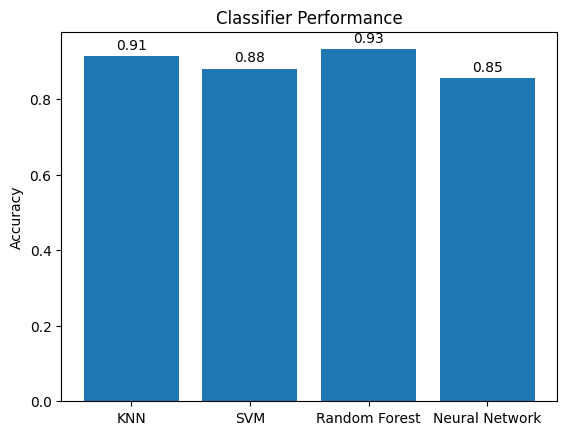

In [13]:
labels = ['KNN', 'SVM', 'Random Forest', 'Neural Network']
accuracies = [knn_acc, svm_acc, rf_acc, nn_acc]

plt.bar(labels, accuracies)
plt.ylabel('Accuracy')
plt.title('Classifier Performance')

for i, value in enumerate(accuracies):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()
